In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import seaborn as sns
from wordcloud import WordCloud
import time

In [4]:
data = pd.read_csv(r"D:\data science\bestsellers with categories.csv")
data.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB


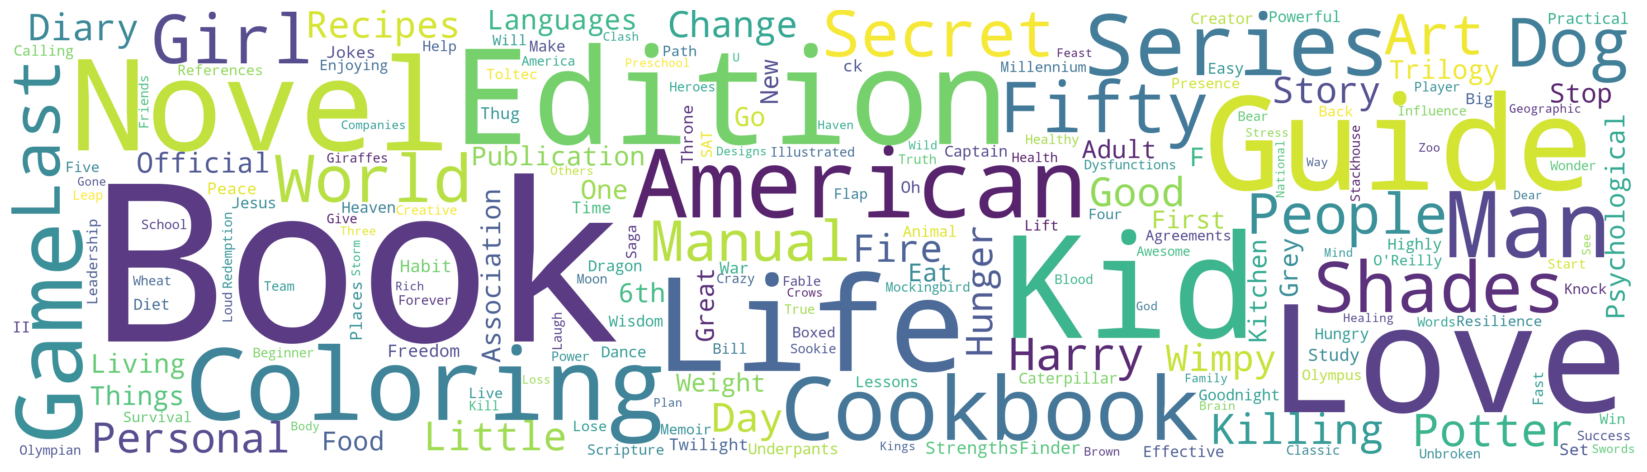

In [6]:
# Creating cloud of most repetitive words in the book names
text = " ".join(title for title in data.Name)

# Creating word_cloud with text as argument in .generate() method
word_cloud = WordCloud(width=3600,
                       height=1000,
                       collocations = False, 
                       background_color = 'white',).generate(text)

# Display the generated Word Cloud
plt.figure(figsize=(21,6))
plt.imshow(word_cloud, 
           interpolation='bilinear',
           alpha=0.9)

plt.axis("off")
plt.show()

In [7]:
# How many times have authors sold their books as bestseller between 2009 - 2019
for i in data.Author.value_counts().unique():
        print("The authors that have {} bestselling books between 2009 - 2019".format(i))
        print(data.Author.value_counts()[data.Author.value_counts()==data.Author.value_counts().unique()[i-1]].keys().to_list(),"\n")

The authors that have 12 bestselling books between 2009 - 2019
['Angie Thomas', 'Thomas Campbell', 'Randall Munroe', 'Adir Levy', 'Pierre Dukan', 'The Washington Post', 'Heidi Murkoff', 'Jon Stewart', 'Delegates of the Constitutional\x85', 'Mark Hyman M.D.', 'Paul Kalanithi', 'Delia Owens', 'Hillary Rodham Clinton', 'Maurice Sendak', 'Paula McLain', 'The Staff of The Late Show with\x85', 'Cheryl Strayed', 'Patrick Thorpe', 'Ken Follett', 'Geneen Roth', 'Bill Simmons', 'Bessel van der Kolk M.D.', 'James Dashner', 'Sara Gruen', 'Audrey Niffenegger', 'Jon Meacham', 'Jonathan Cahn', 'Alex Michaelides', 'Margaret Atwood', 'Mary Ann Shaffer', 'David McCullough', 'Charles Krauthammer', 'F. A. Hayek', 'Stephen Kendrick', 'Jay Asher', 'Charles Duhigg', 'Muriel Barbery', 'Tina Fey', 'Chip Gaines', 'Robert Jordan', 'Andy Weir', 'Edward M. Kennedy', 'Dave Ramsey', 'Dinah Bucholz', 'Randy Pausch', 'Alan Moore', 'Silly Bear', 'JJ Smith', 'Michael Lewis', "Sasha O'Hara", 'Thomas Piketty', 'Chrissy Te

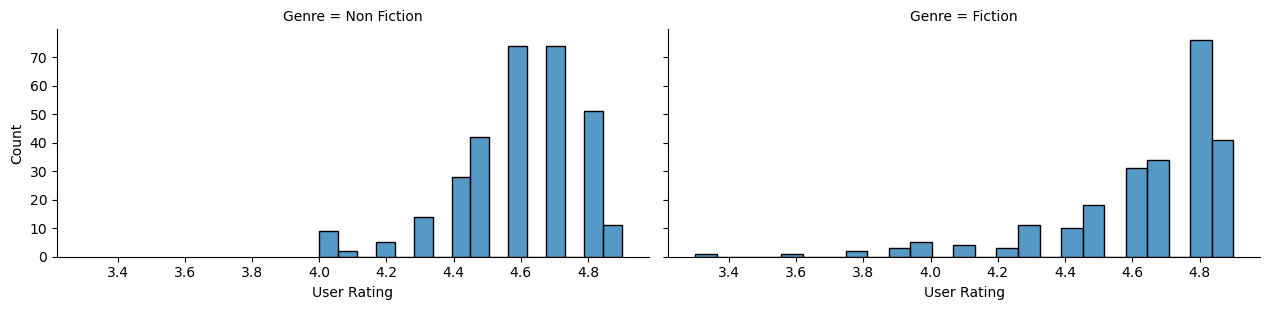

In [8]:
# Which genre has more user rating?
g = sns.FacetGrid(data, col="Genre", height=3.2, aspect=2)
g.map(sns.histplot, "User Rating")

<AxesSubplot:xlabel='Year', ylabel='Reviews'>

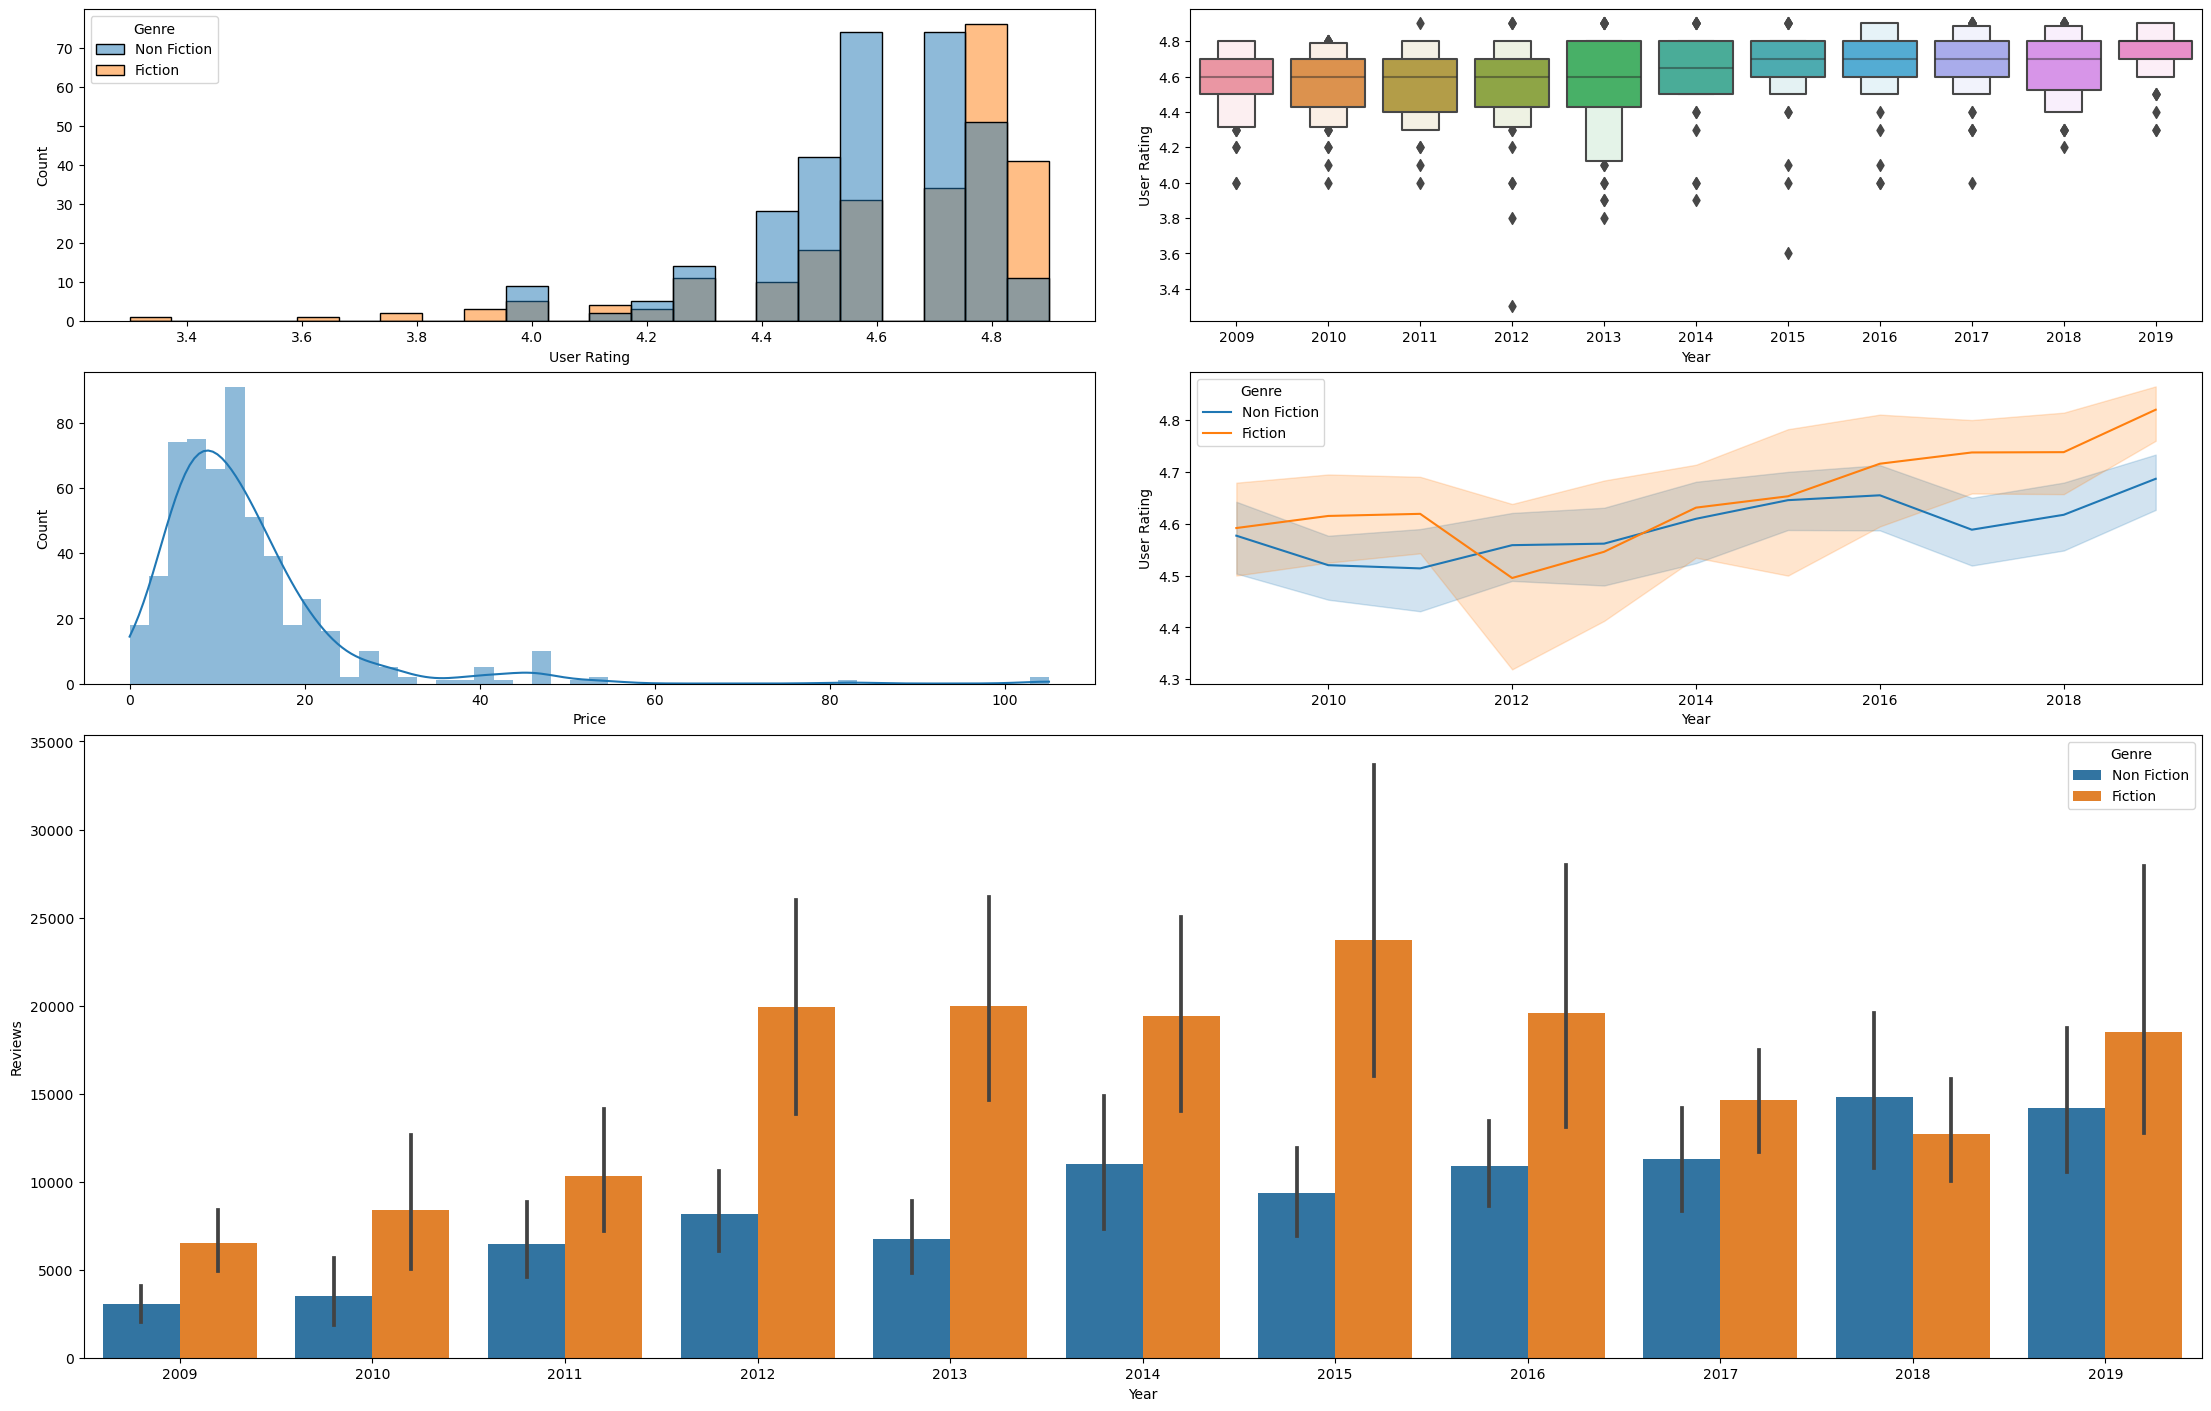

In [9]:
def format_axes(fig):
    for i, ax in enumerate(fig.axes):
        ax.tick_params(labelbottom=True, labelleft=True)

fig = plt.figure(constrained_layout=True, figsize=(22,14))

gs = GridSpec(4, 2, figure=fig)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[1, 0])
ax4 = fig.add_subplot(gs[1, 1])
ax5 = fig.add_subplot(gs[2:, :])

sns.histplot(ax=ax1, data=data, x=data["User Rating"], hue="Genre")
sns.boxenplot(ax=ax2, data=data, x = data["Year"], y=data["User Rating"])
sns.histplot(ax=ax3,  data=data, x=data["Price"],  kde=True, linewidth=0)
sns.lineplot(ax=ax4, data=data, x = data["Year"], y=data["User Rating"], hue="Genre")
sns.barplot(ax=ax5, data=data, x = data["Year"], y=data["Reviews"], hue="Genre")

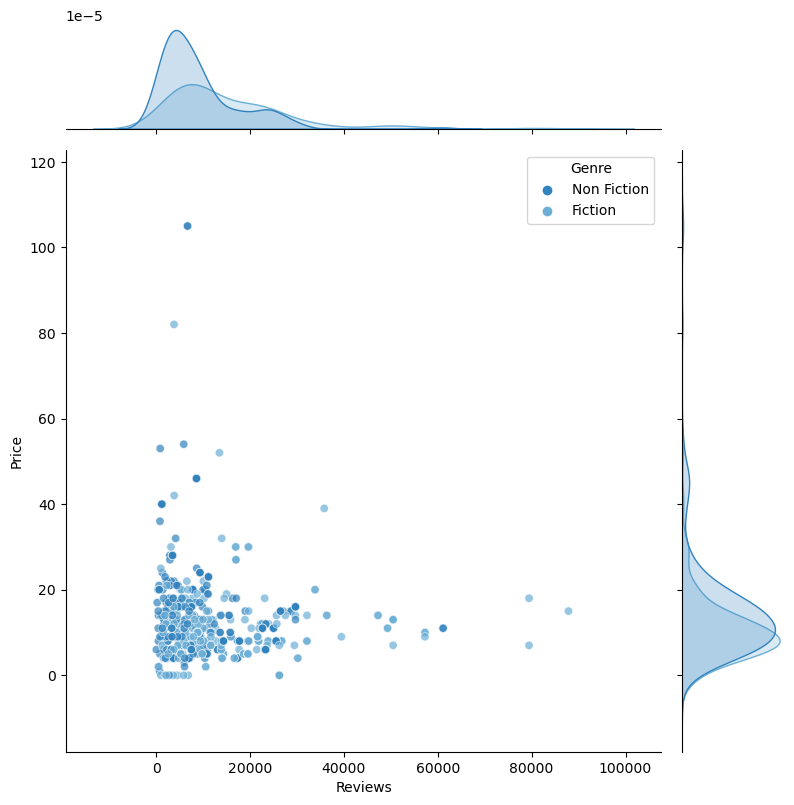

In [10]:
# Review - Price Relations
sns.jointplot(y=data["Price"],x=data["Reviews"],hue=data["Genre"],alpha=0.7,palette="tab20c",height=8)
plt.show()

In [11]:
# Outlier Detection

def find_outliers(data):
    global q_list
    q_list = []
    sorted_data = data.sort_values()
    
    for q, p in {"Q1": 25, "Q2": 50, "Q3": 75}.items():
        
        # Calculate Q1, Q2, Q3 and IQR.
        Q = np.percentile(sorted_data, p, interpolation = 'midpoint')
        q_list.append(Q)
        
        print("Checking...", q)
        time.sleep(2) 
        print("{}: {} percentile of the {} values is,".format(q,p,data.name), Q)
    
    global Q1, Q2, Q3
    
    Q1 = q_list[0]
    Q2 = q_list[1]
    Q3 = q_list[2]
    
    IQR = Q3 - Q1 
    print("Interquartile range is", IQR)
    
    # Find the lower and upper limits as Q1 – 1.5 IQR and Q3 + 1.5 IQR, respectively
    global low_lim, up_lim
    
    low_lim = Q1 - 1.5 * IQR
    up_lim = Q3 + 1.5 * IQR
    
    time.sleep(1)
    print(" ")
    print("Checking limits")
    time.sleep(2)
    print("low_limit is", low_lim)
    print("up_limit is", up_lim)
    
    
    time.sleep(1)
    # Find outliers in the dataset
    outliers =[]
    for x in sorted_data:
        if ((x> up_lim) or (x<low_lim)):
             outliers.append(x)
    print("\nOutliers are being added to list. Please wait!")
    time.sleep(3)
    print("\nOutliers in the dataset is", outliers)


find_outliers(data.Reviews)

Checking... Q1
Q1: 25 percentile of the Reviews values is, 4088.0
Checking... Q2
Q2: 50 percentile of the Reviews values is, 8580.0
Checking... Q3
Q3: 75 percentile of the Reviews values is, 17183.5
Interquartile range is 13095.5
 
Checking limits
low_limit is -15555.25
up_limit is 36826.75

Outliers are being added to list. Please wait!

Outliers in the dataset is [39459, 47265, 47265, 49288, 49288, 50482, 50482, 50482, 50482, 57271, 57271, 57271, 61133, 61133, 79446, 79446, 87841]


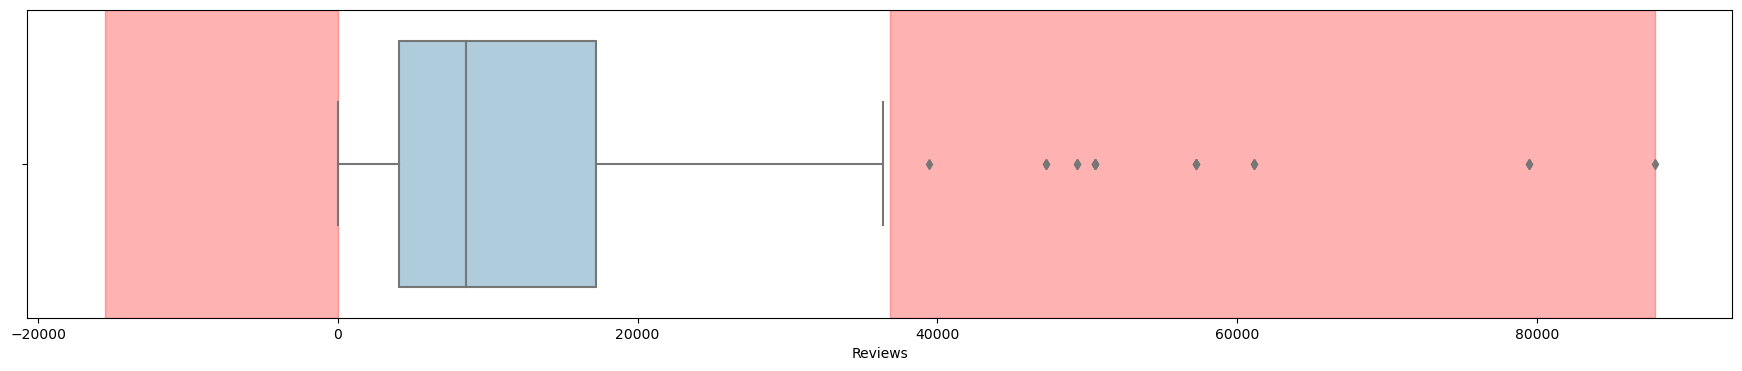

In [12]:
# Visualizing Outliers

def plot_outliers(data):
    # Paint red outlier areas on the boxplot
    f, ax = plt.subplots(figsize=(22,4))
    ax.ticklabel_format(style='plain', axis='both')
    
    outliers = sns.boxplot(ax=ax, x=data, palette="Paired")
    plt.axvspan(xmin = low_lim, xmax = data.min(), alpha=0.3, color='red')
    plt.axvspan(xmin = up_lim, xmax = data.max(), alpha=0.3, color='red')
    
plot_outliers(data.Reviews)